# PD Model Valiation

### Out of sample validation (test)

In [19]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import numpy as np
import pickle
# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values


loan_data_inputs_test = pd.read_csv(r'D:\Datasets\LendingClub\loan_data_inputs_test.csv', index_col=0)
loan_data_targets_test = pd.read_csv(r'D:\Datasets\LendingClub\loan_data_targets_test.csv', index_col=0).values.reshape(-1,)

In [20]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ME_DC_WY_WV_VT_MS',
'addr_state:NY',
'addr_state:RI_NM_NC_OK_SD_VA_LA',
'addr_state:MD_NJ_MO',
'addr_state:CA',
'addr_state:ID_TN',
'addr_state:AZ_MI_UT_AR_PA_OH_MN_IN',
'addr_state:KY_MA_GA_WA_WI_DE',
'addr_state:OR_IL',
'addr_state:TX',
'addr_state:CT_SC_AK',
'addr_state:KS_CO_MT_NH',
'verification_status:Verified',
'verification_status:Source Verified',
'verification_status:Not Verified',
'purpose:edu_sb_re_m_h_other',
'purpose:med_wed_vac',
'purpose:debt_consolidation',
'purpose:hi_mp_car',
'purpose:credit_card',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:<40-41',
'mths_since_issue_d:<42-48',
'mths_since_issue_d:<49-52',
'mths_since_issue_d:<53-64',
'mths_since_issue_d:<65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<142',
'mths_since_earliest_cr_line:142-266',
'mths_since_earliest_cr_line:266-355',
'mths_since_earliest_cr_line:>355',
#'delinq_2yrs:0',
#'delinq_2yrs:1-3',
#'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
#'open_acc:0',
#'open_acc:1-3',
#'open_acc:4-12',
#'open_acc:13-17',
#'open_acc:18-22',
#'open_acc:23-25',
#'open_acc:26-30',
#'open_acc:>=31',
#'pub_rec:0-2',
#'pub_rec:3-4',
#'pub_rec:>=5',
#'total_acc:<=25',
#'total_acc:25-51',
#'total_acc:>=51',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
#'total_rev_hi_lim:<=5K',
#'total_rev_hi_lim:5K-10K',
#'total_rev_hi_lim:10K-20K',
#'total_rev_hi_lim:20K-30K',
#'total_rev_hi_lim:30K-40K',
#'total_rev_hi_lim:40K-55K',
#'total_rev_hi_lim:55K-95K',
#'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86',
]]

In [21]:
# removing one dummy variable for k-1
ref_categories = ['grade:G',
                'home_ownership:RENT_OTHER_NONE_ANY',
                'addr_state:ND_NE_IA_NV_HI_FL_AL',
                'verification_status:Verified',
                'purpose:edu_sb_re_m_h_other',
                 'initial_list_status:f',
                 'term:60',
                 'emp_length:0',
                 'mths_since_issue_d:>84',
                 'int_rate:>20.281',
                 'mths_since_earliest_cr_line:<142',
                 'delinq_2yrs:>=4',
                 'inq_last_6mths:>6',
                 'open_acc:0',
                 'pub_rec:>=5',
                 'total_acc:<=25',
                 'acc_now_delinq:>=1',
                 'total_rev_hi_lim<=5K',
                 'annual_inc:<20K',
                 'mths_since_last_delinq:Missing',
                 'dti>35',
                 'mths_since_last_record:Missing']

In [22]:
# selecting the desires columns
sel_cols = [c for c in inputs_test_with_ref_cat.columns if c not in ref_categories]

In [23]:
inputs_test = inputs_test_with_ref_cat[sel_cols]
# loan_data_targets_test

In [24]:
inputs_test.shape

(93257, 82)

In [25]:
loaded_model = pickle.load(open('pd_model.sav', 'rb'))

In [26]:
# predicted classes
y_hat_test = loaded_model.model.predict(inputs_test)

In [30]:
y_hat_test_proba = loaded_model.model.predict_proba(inputs_test)

In [31]:
y_hat_test_proba
# first element is probability of default
# second element is probability of being a good borrower

array([[0.05850652, 0.94149348],
       [0.11849123, 0.88150877],
       [0.28477727, 0.71522273],
       ...,
       [0.03732879, 0.96267121],
       [0.14384913, 0.85615087],
       [0.11516422, 0.88483578]])

In [33]:
# probability of being a good borrower
y_hat_test_proba = y_hat_test_proba[:][:, 1]

In [34]:
y_hat_test_proba

array([0.94149348, 0.88150877, 0.71522273, ..., 0.96267121, 0.85615087,
       0.88483578])

In [35]:
loan_data_targets_test_temp = loan_data_targets_test

In [40]:
df_actual_predicted_probs = pd.concat([pd.DataFrame(loan_data_targets_test_temp), pd.DataFrame(y_hat_test_proba)], axis=1)
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
0,1,0.941493
1,1,0.881509
2,1,0.715223
3,1,0.941492
4,1,0.674983


In [41]:
# setting the index as the same as the testing data 
df_actual_predicted_probs.index = loan_data_inputs_test.index
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
421662,1,0.941493
345847,1,0.881509
87245,1,0.715223
422411,1,0.941492
131614,1,0.674983


### Accuracy and Area under curve

In [42]:
# cutoff threshold
tr = 0.5
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
421662,1,0.941493,1
345847,1,0.881509,1
87245,1,0.715223,1
422411,1,0.941492,1
131614,1,0.674983,1


In [43]:
# confusion matrix for model evaluation
# TP FP
# FN TN
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,10,10094
1,14,83139


In [48]:
# as proportions 
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.000107,0.108239
1,0.000150,0.891504


In [47]:
# accuracy of the model
# total correctly predicted / total number of observations
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0,0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.8916113535713137

In [49]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,10,10094
1,14,83139


In [ ]:
# 10 correctly predicted bads
# 10094 bads predicted as goods
# 83139 correctly predicted goods
# 14 goods predicted as bads

# TP FP
# FN TN

In [50]:
# changing the threshold
# cutoff threshold
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
421662,1,0.941493,1
345847,1,0.881509,0
87245,1,0.715223,0
422411,1,0.941492,1
131614,1,0.674983,0


In [51]:
# confusion matrix for model evaluation
# TP FP
# FN TN
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7156,2948
1,34893,48260


In [52]:
# as proportions 
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.076734,0.031612
1,0.374160,0.517495


In [53]:
# accuracy of the model
# total correctly predicted / total number of observations
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0,0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5942288514535102

In [54]:
# receiver operating characteristic curve
# shows the accuracy at different cutoff thresholds
from sklearn.metrics import roc_curve, roc_auc_score

In [55]:
# roc returns three arrays: FP rates, TP rates, thresholds

roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])


(array([0.        , 0.        , 0.        , ..., 0.99990103, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20260243e-05, 2.52546511e-04, ...,
        9.99951896e-01, 9.99951896e-01, 1.00000000e+00]),
 array([1.99311396, 0.99311396, 0.99099941, ..., 0.37691877, 0.37573814,
        0.34376721]))

In [56]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

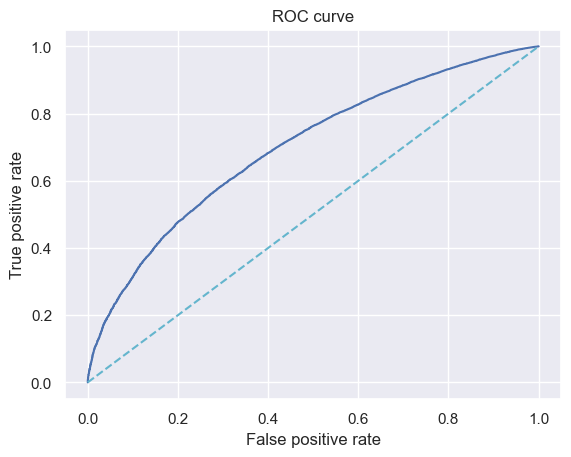

In [60]:
plt.plot(fpr, tpr) # ROC curve
plt.plot(fpr, fpr, linestyle= '--', color='c') # Benchmark 50/50
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [62]:
# area under the ROC curve is AUC is a good measure of how well the classification model is performing
# each point on the curve represents different confusion matrices with different cutoff thresholds
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.6992656497020597

In [63]:
# bad = 50-60
# poor = 60-70
# fair = 70-80
# good = 80-90
# excellent = 90-100

In [64]:
# gini coefficient - measure inequality between defaulted and non-defaulted borrowers
# cumulative proportion of defaulted as function of cumulative proportion of all borrowers
# similiar to auc - greater the proportion the better the model

# Kolmogorov-Smirnov coefficient
# to what extent the model provides seperation between good and bad borrowers

In [65]:
# gini coefficient
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [66]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [67]:
# cumulative % total population
# cumulative % good borrowers
# cumulative % bad borrowers

df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [68]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / df_actual_predicted_probs.shape[0]
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

Text(0.5, 1.0, 'Gini')

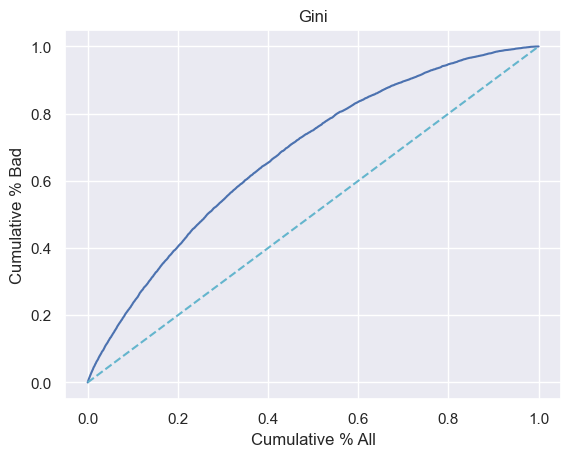

In [71]:
# gini = cumulative % bad as function of cumulative % all borrowers
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle= '--', color='c')
plt.xlabel('Cumulative % All')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [72]:
Gini = AUROC * 2 - 1
Gini

0.39853129940411947

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

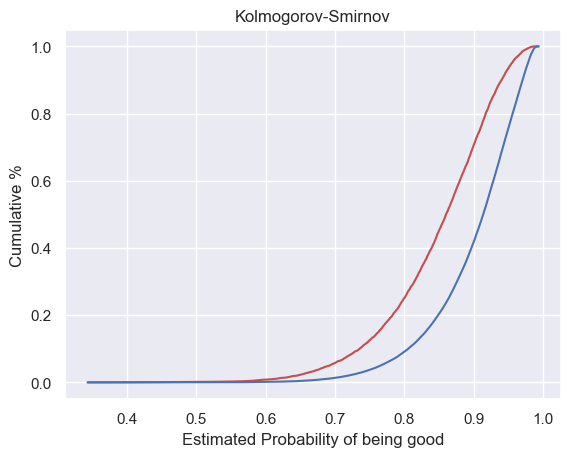

In [73]:
# Kolmogorov-Smirnov difference between cumulative bad and cumulative good in binary classification
# gini = cumulative % bad as function of cumulative % all borrowers
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability of being good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [74]:
# KS coefficient is maximum of the difference between cumulative % bad and cumulative perc good
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.2886980513717671